In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
matplotlib.rcParams['figure.figsize'] = (15,10)

In [3]:
from scipy import integrate as it

In [4]:
def factory(p, phi):
    e_necos = exp(-cos(phi))
    sin_phi = sin(phi)
    def f(r):
        e_nercos = e_necos ** r
        cos_theta = cos(r * sin_phi)
        return e_nercos * cos_theta / (r * ( 1 - 2 * p * e_nercos * cos_theta + p * p * e_nercos * e_nercos))
    return f

In [5]:
it.quad(factory(0.8, pi * 0.5), pi/2, 17* pi / 2)

(4.482008904836924, 8.479177304205172e-11)

In [6]:
x = linspace(1,10,1000)

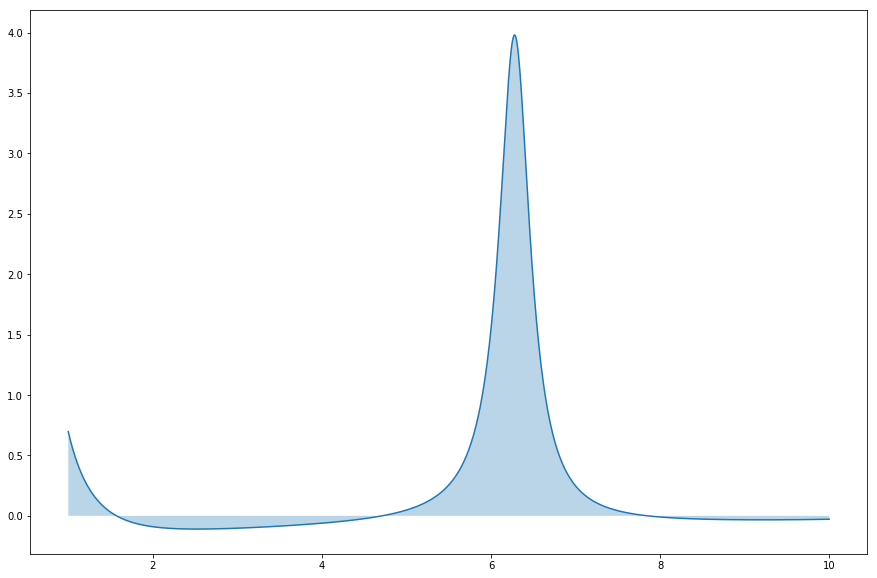

In [7]:
plot(x, factory(0.8, pi * 0.5)(x))
fill_between(x, 0 * x, factory(0.8, pi * 0.5)(x), alpha=0.3)

In [8]:
def factory2(p, phi):
    e_necos = exp(-cos(phi))
    sin_phi = sin(phi)
    def f(r):
        e_nercos = e_necos ** r
        cos_theta = cos(r * sin_phi)
        return (e_nercos * cos_theta - 0.5) / (r * ( 1 - 2 * p * e_nercos * cos_theta + p * p * e_nercos * e_nercos))
    return f

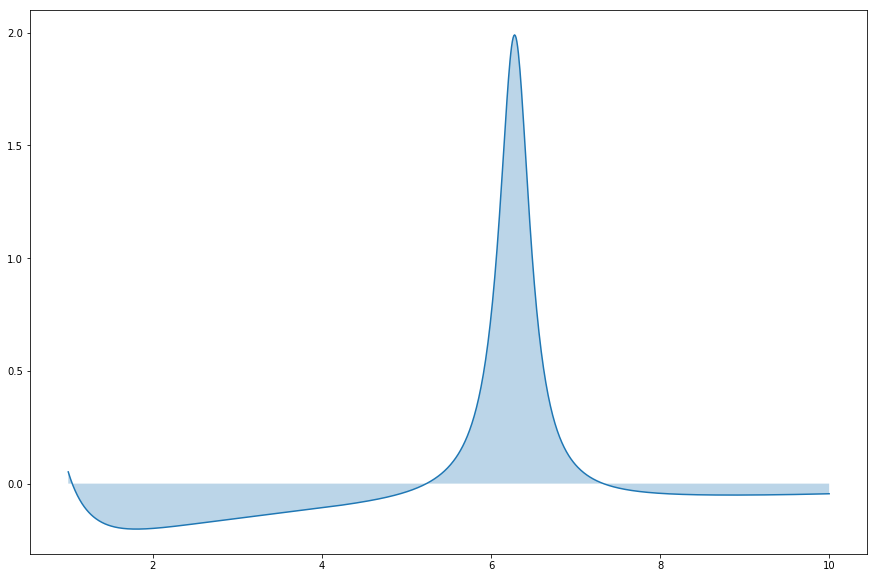

In [9]:
plot(x, factory2(0.8, pi * 0.5)(x))
fill_between(x, 0 * x, factory2(0.8, pi * 0.5)(x), alpha=0.3)

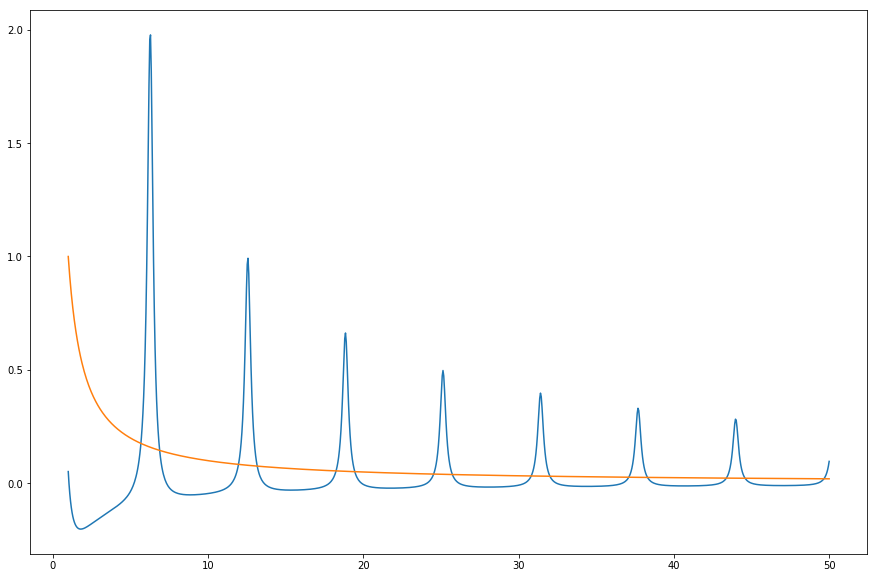

In [10]:
plot(linspace(1,50, 1000),factory2(0.8, pi * 0.5)(linspace(1,50, 1000)))
plot(linspace(1,50, 1000),np.reciprocal(linspace(1,50, 1000)))

In [11]:
it.quad(factory2(0.8, pi * 0.5), 1, 45)

(1.7797205974356183, 9.404472599676266e-09)

In [12]:
def factory3(p, phi):
    e_necos = exp(-cos(phi))
    sin_phi = sin(phi)
    def f(r):
        e_nercos = e_necos ** r
        cos_theta = cos(r * sin_phi)
        return (2 * e_nercos * cos_theta - p * (2 - p) * e_nercos * e_nercos - 1 ) / (r * ( 1 - 2 * p * e_nercos * cos_theta + p * p * e_nercos * e_nercos))
    return f

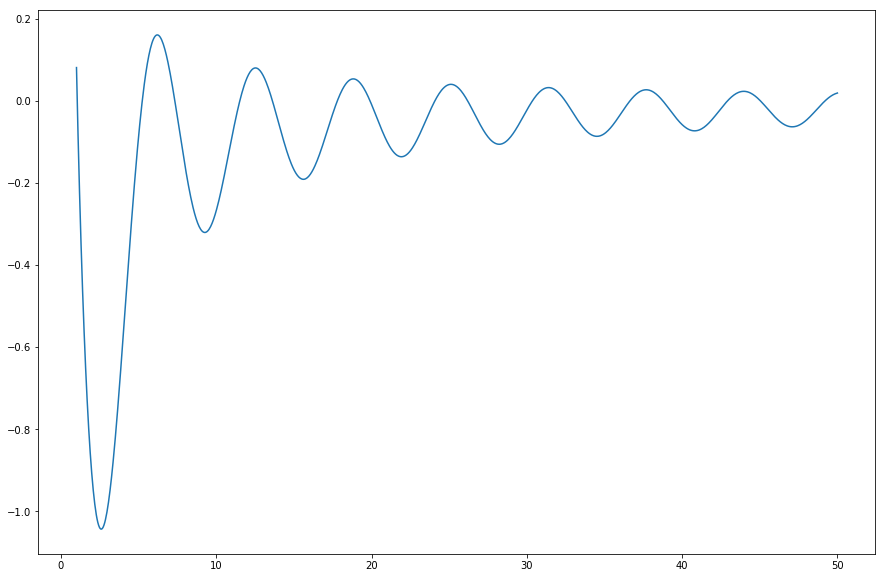

In [13]:
plot(linspace(1, 50, 1000),factory3(0, pi * 0.5)(linspace(1, 50, 1000)))

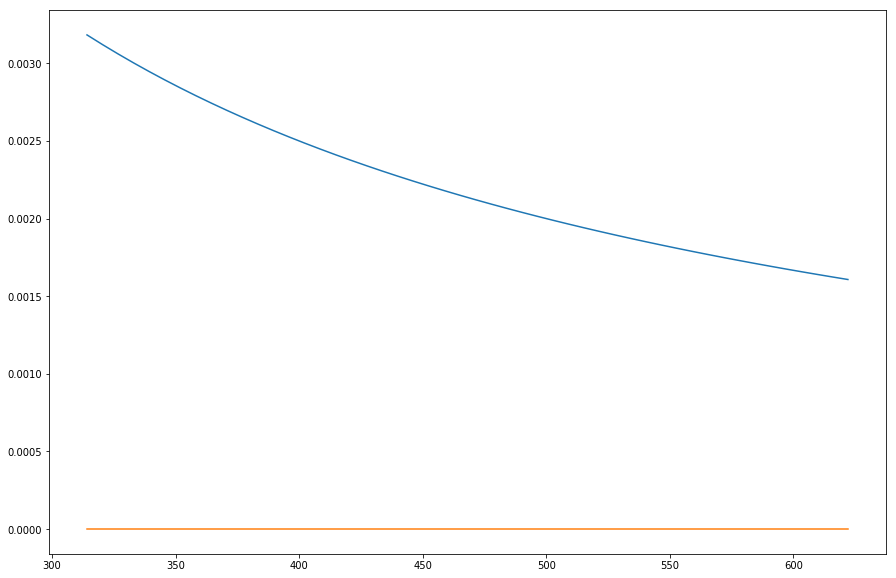

In [14]:
plot(arange(100, 200,2) * pi, factory3(0.99, pi * 0.5)(arange(100, 200,2) * pi))
plot(arange(100, 200,2) * pi, arange(0, 100,2) * 0)

In [15]:
def factory4(p, phi):
    e_necos = exp(-cos(phi))
    sin_phi = sin(phi)
    def f(r):
        e_nercos = e_necos ** r
        cos_theta = cos(r * sin_phi)
        return e_nercos * (p * e_nercos - cos_theta) / (r * ( 1 - 2 * p * e_nercos * cos_theta + p * p * e_nercos * e_nercos))
    return f

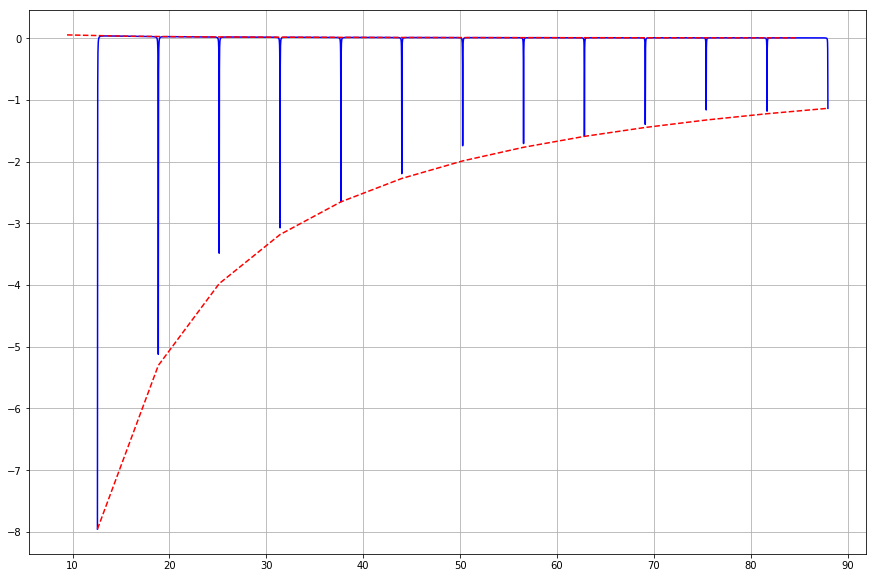

In [16]:
x2 = arange(4, 30, 2) * pi
f = factory4(0.99, pi * 0.5)
x2l = linspace(x2[0], x2[-1], 10000)
figure()
plot(x2l, f(x2l), 'blue')
plot(x2, f(x2), 'r--')
plot(x2-pi, f(x2-pi), 'r--')
grid(True)

In [17]:
def factory5(p, alpha):
    e_ma = exp(-alpha)
    def f(t):
        e_mat = e_ma ** t
        cos_t = cos(t)
        nom = e_mat * (p * e_mat - cos_t)
        denom = 1 + p*p*e_mat*e_mat - 2*p*e_mat*cos_t
        denom *= t
        return nom / denom
    return f

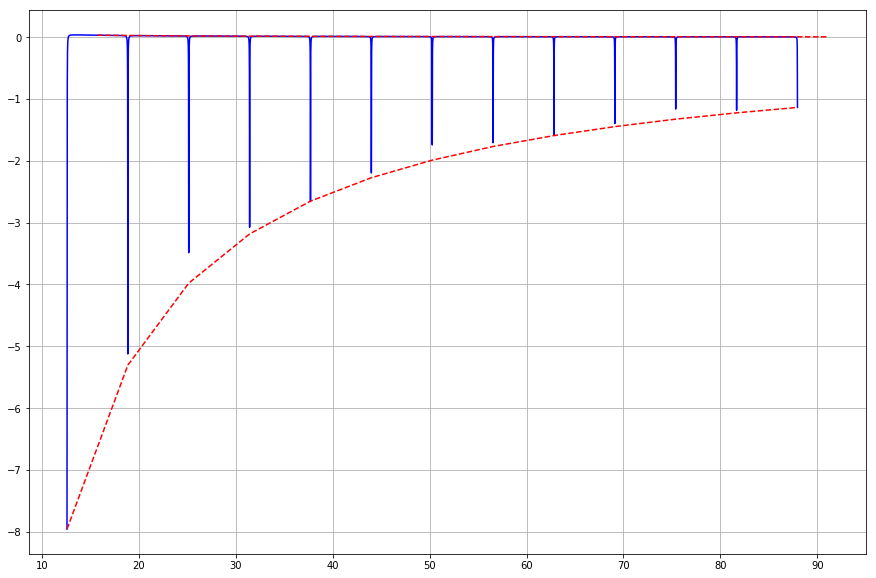

In [18]:
x2 = arange(4, 30, 2) * pi
f = factory5(0.99, 0.0)
x2l = linspace(x2[0], x2[-1], 10000)
figure()
plot(x2l, f(x2l), 'blue')
plot(x2, f(x2), 'r--')
plot(x2+pi, f(x2+pi), 'r--')
grid(True)

In [19]:
def integrator(alpha):
    return it.quad(factory5(0.99, alpha), 2.5 * pi, 4.5 * pi)[0]

In [20]:
vals = np.vectorize(integrator)(arange(0.01, 1.01, 0.01))

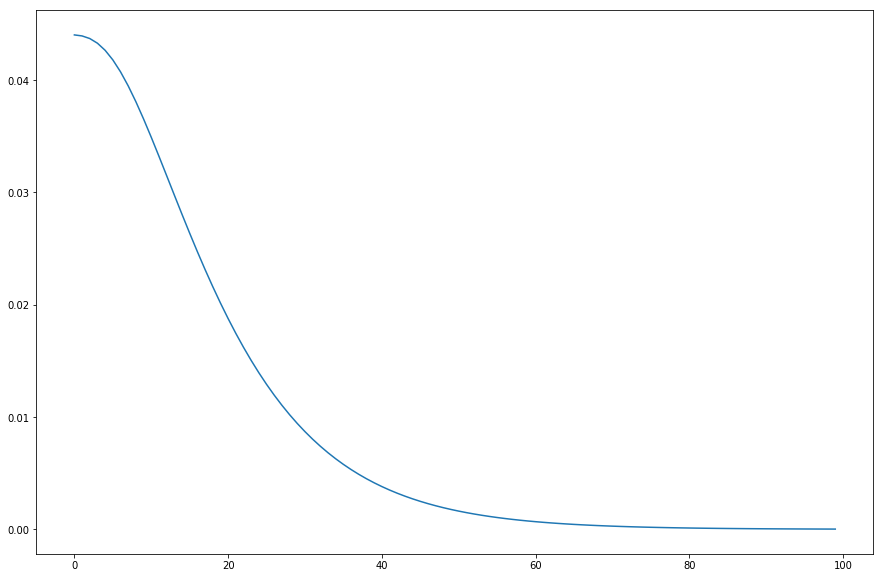

In [21]:
plot(vals)

In [22]:
def factory6(p, alpha):
    e_ma = exp(-alpha)
    def f(t):
        e_mat = e_ma ** t
        cos_t = cos(t)
        nom = e_mat * (cos_t*(1 + p*p*e_mat*e_mat) - 2*p*e_mat)
        denom = 1 + p*p*e_mat*e_mat - 2*p*e_mat*cos_t
        denom *= denom
        return nom / denom
    return f

In [23]:
it.quad(factory6(0.9, 0.0), 0.5 * pi, 2.5 * pi)

(9.85878045867139e-14, 2.3063901359501177e-09)

In [24]:
def factory7(p, alpha):
    e_ma = exp(-alpha)
    def f(t):
        e_mat = e_ma ** t
        cos_t = cos(t)
        nom = e_mat * (cos_t*(1 + p*p*e_mat*e_mat) - 2*p*e_mat)
        denom = (1 + p * e_mat)**2 * (nom < 0) + (1 - p * e_mat)**2 * (nom >= 0)
        denom *= denom
        return nom / denom
    return f

In [25]:
it.quad(factory6(0.9, 0.0), 0.5 * pi, 2.5 * pi, weight='sin', wvar=1.0)

(-9.654464883693364e-15, 5.114658696570018e-14)

In [26]:
factory5(0.8, 1.0)(linspace(0.5 * pi, 2.5 * pi, 1000000)).sum() * 2 * pi / 1000000

0.04616554790792387

In [27]:
def factory8(p, alpha1, alpha2):
    e_a1, e_a2 = exp(alpha1), exp(alpha2)
    def f(t):
        e_at1 = e_a1 ** t
        e_at2 = e_a2 ** t
        e_av = sqrt(e_at1 * e_at2)
        cos_t = cos(t)
        nom = (cos_t * (p * p + e_at1 * e_at2) - p *(e_at1 + e_at2)) * (e_at1 - e_at2)
        denom = t
        denom *= e_at1 * e_at1 - 2 * p * e_at1 * cos_t + p * p
        denom *= e_at2 * e_at2 - 2 * p * e_at2 * cos_t + p * p
        return nom / denom
    return f

In [28]:
factory8(0.7, 0.0, 0.0001)(linspace(0.5 * pi, 2.5 * pi, 10000000)).sum() * 2 * pi / 10000000

7.2628522423261564e-09

In [29]:
def factory9(p, alpha):
    e_a = exp(alpha)
    def f(t):
        e_at = e_a ** t
        scos_t = cos(t) * e_at
        nom = scos_t - p
        denom = 1
        denom *= (p - scos_t)*(p - scos_t) + e_at * e_at - scos_t * scos_t
        return nom / denom
    return f

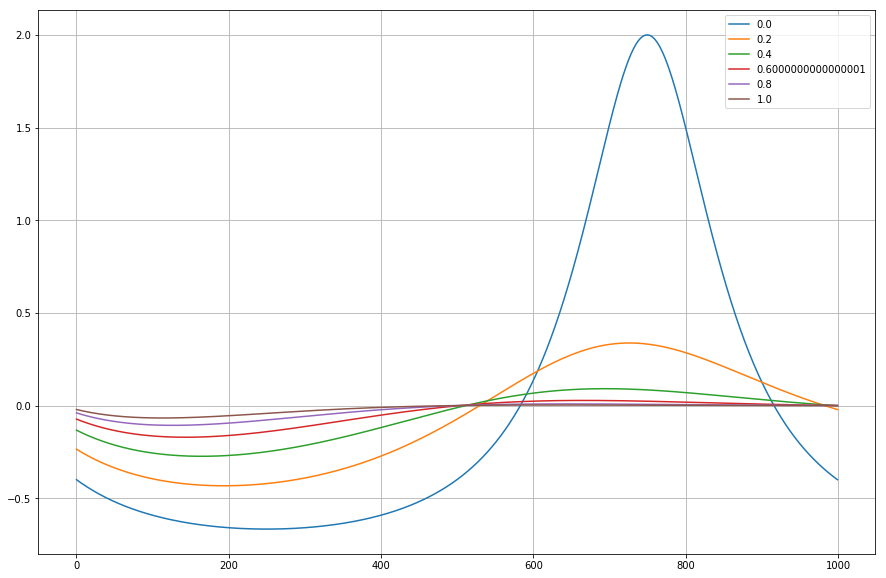

In [30]:
for alpha in arange(0, 1.1, 0.2):
    plot(factory9(0.5, alpha)(linspace(0.5 * pi,  2.5 * pi, 1000)), label=f'{alpha}')
grid(True)
legend()

In [31]:
factory9(0.5, 1)(linspace(0.5 * pi,  2.5 * pi, 1000000)).sum()  * pi / 1000000

-0.05437324975679469

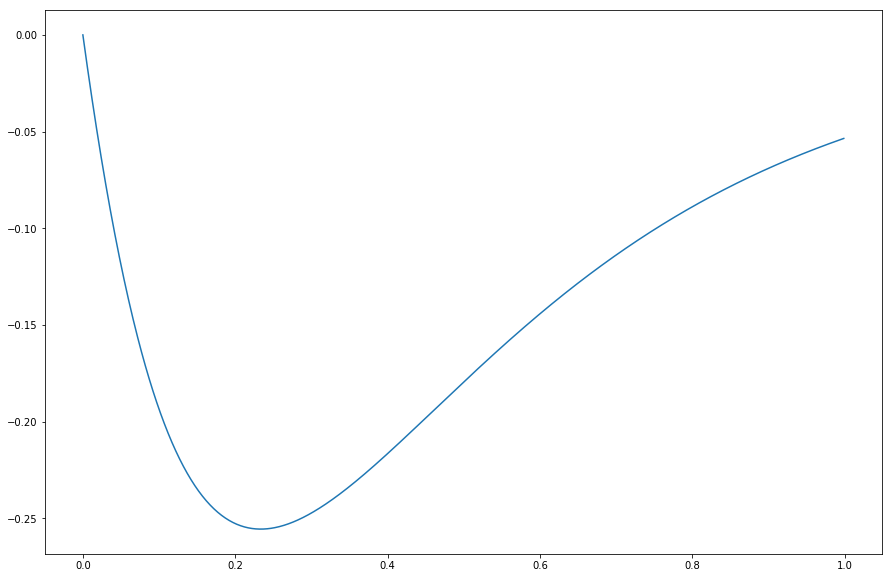

In [182]:
plot(np.arange(0.0, 1.0, 0.001),factory9(0.3, np.arange(0.0, 1.0, 0.001)[:, None])(linspace(0.5 * pi,  2.5 * pi, 100000)).sum(axis=1)  * pi / 100000)

In [33]:
def prime(p):
    dd = (1 + p) / (1 - p)
    def f(t):
        return (arctan(dd * tan(t/2)) - t/2) / p
    return f

In [34]:
prime(0.9)(pi) - prime(0.9)(0.5 * pi)

-0.8142390019850072

In [35]:
prime(0.9)(5 * pi /2) - prime(0.9)(pi + np.finfo('d').eps * 2)

0.8142390019850074

In [163]:
def factory10(p, alpha):
    def f(t):
        e_at = exp(-alpha *t)
        cos_t = cos(t)
        pe_at = p * e_at
        nom =  2 * e_at *(cos_t - pe_at) 
        denom = t
        denom *= (pe_at - cos_t)*(pe_at - cos_t) + 1 - cos_t * cos_t
        return nom / denom
    return f

In [179]:
factory10(p, alpha)(linspace(1, 100001, 100000000)).sum() / 1000

-0.6077710402041107

In [124]:
factory10(0.9, 0.00000)(linspace(1, 100001, 100000000)).sum() / 1000

-23.152686539340852

In [130]:
factory10(0.9, 0.00000)(linspace(1, 100001, 100000000)).sum() / 1000

11.513435438124136